In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt

### Loading MNIST data

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [3]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [4]:
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [5]:
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000022A80B534C0>, <torch.utils.data.dataloader.DataLoader object at 0x0000022A80B53340>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [6]:
train_data_feature, train_data_label = next(iter(train_dataloader))
train_data_feature.shape, train_data_label.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [7]:
def visualize_data():
    random_idx = torch.randint(0, len(train_data_feature), size=[1]).item()
    image, label = train_data_feature[random_idx], train_data_label[random_idx]
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)
    print(f"Label {label}:\nClass Name = {class_names[label]}\nImage shape = {image.shape}")
    plt.show()

Label 0:
Class Name = 0 - zero
Image shape = torch.Size([1, 28, 28])


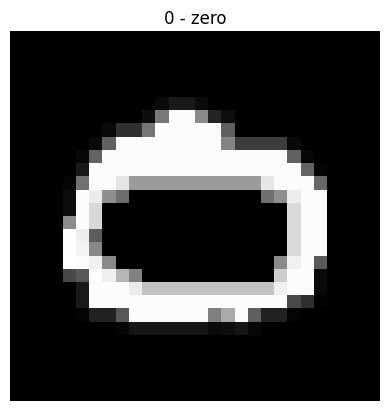

In [8]:
visualize_data()